In [2]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
from iexfinance.stocks import get_historical_data
def get_iex_data(stock_list, start=datetime(2015,1,1), end=datetime(2019,12,31)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [3]:
hun_etfs = ['SPY']
data = get_iex_data(hun_etfs)
data

[              open    high     low   close     volume ticker
 date                                                        
 2015-01-09  206.40  206.42  203.51  204.25  158567288    SPY
 2015-01-12  204.41  204.60  201.92  202.65  144396067    SPY
 2015-01-13  204.12  205.48  200.51  202.08  214553306    SPY
 2015-01-14  199.65  201.10  198.57  200.86  192991092    SPY
 2015-01-15  201.63  202.01  198.88  199.02  176613906    SPY
 ...            ...     ...     ...     ...        ...    ...
 2019-12-24  321.47  321.52  320.90  321.23   20270007    SPY
 2019-12-26  321.65  322.95  321.64  322.94   31024188    SPY
 2019-12-27  323.74  323.80  322.28  322.86   42554820    SPY
 2019-12-30  322.95  323.10  320.55  321.08   49782730    SPY
 2019-12-31  320.53  322.13  320.15  321.86   57106998    SPY
 
 [1253 rows x 6 columns]]

In [7]:
spy = data[0]
spy.to_csv('spy.csv', encoding='utf-8')

In [8]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [9]:
data = clean_data(data)

In [10]:
data

[              open    high     low   close     volume ticker
 date                                                        
 2015-01-09  206.40  206.42  203.51  204.25  158567288    SPY
 2015-01-12  204.41  204.60  201.92  202.65  144396067    SPY
 2015-01-13  204.12  205.48  200.51  202.08  214553306    SPY
 2015-01-14  199.65  201.10  198.57  200.86  192991092    SPY
 2015-01-15  201.63  202.01  198.88  199.02  176613906    SPY
 ...            ...     ...     ...     ...        ...    ...
 2019-12-24  321.47  321.52  320.90  321.23   20270007    SPY
 2019-12-26  321.65  322.95  321.64  322.94   31024188    SPY
 2019-12-27  323.74  323.80  322.28  322.86   42554820    SPY
 2019-12-30  322.95  323.10  320.55  321.08   49782730    SPY
 2019-12-31  320.53  322.13  320.15  321.86   57106998    SPY
 
 [1253 rows x 6 columns]]

In [11]:
ts = data[0]['close']

## ARIMA analysis

In [6]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [7]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [13]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8799      0.073    -11.999      0.000      -1.024      -0.736
ar.L2         -0.0677      0.019     -3.556      0.000      -0.105      -0.030
ma.L1          0.1604      1.500      0.107      0.915      -2.780       3.101
ma.L2         -1.1604      1.763     -0.658      0.510      -4.616       2.295
ma.S.L5       -0.0536      0.024     -2.250      0.024      -0.100      -0.007
ma.S.L10      -0.0255      0.021     -1.211      0.226      -0.067       0.016
sigma2         3.1110      4.750      0.655      0.512      -6.198      12.420


In [24]:
csv_output = output.summary().tables[1]

summary_df = pd.DataFrame(csv_output, index=None)
# csv_output.to_csv('spy_summary.csv', encoding='utf-8')
# csv_output
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df[1:]

summary_df.to_csv('spy_summary.csv', encoding='utf-8')
summary_df


,,coef,std err,z,P>|z|,[0.025,0.975]
1,ar.L1,-0.8799,0.073,-11.999,0.000,-1.024,-0.736
2,ar.L2,-0.0677,0.019,-3.556,0.000,-0.105,-0.030
3,ma.L1,0.1604,1.500,0.107,0.915,-2.780,3.101
4,ma.L2,-1.1604,1.763,-0.658,0.510,-4.616,2.295
5,ma.S.L5,-0.0536,0.024,-2.250,0.024,-0.100,-0.007
6,ma.S.L10,-0.0255,0.021,-1.211,0.226,-0.067,0.016
7,sigma2,3.1110,4.750,0.655,0.512,-6.198,12.420


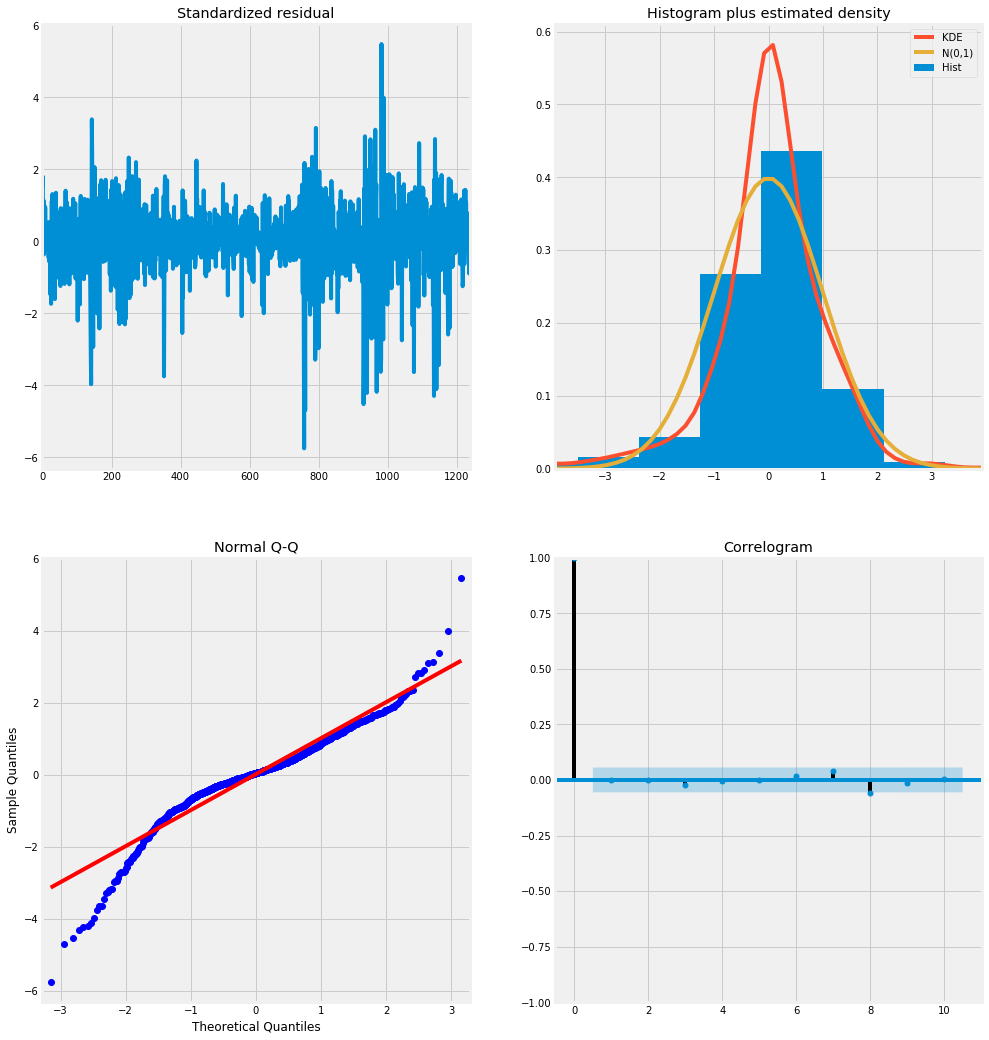

In [26]:
output.plot_diagnostics(figsize=(15, 18))
plt.savefig('spyoutput.png')
plt.show()

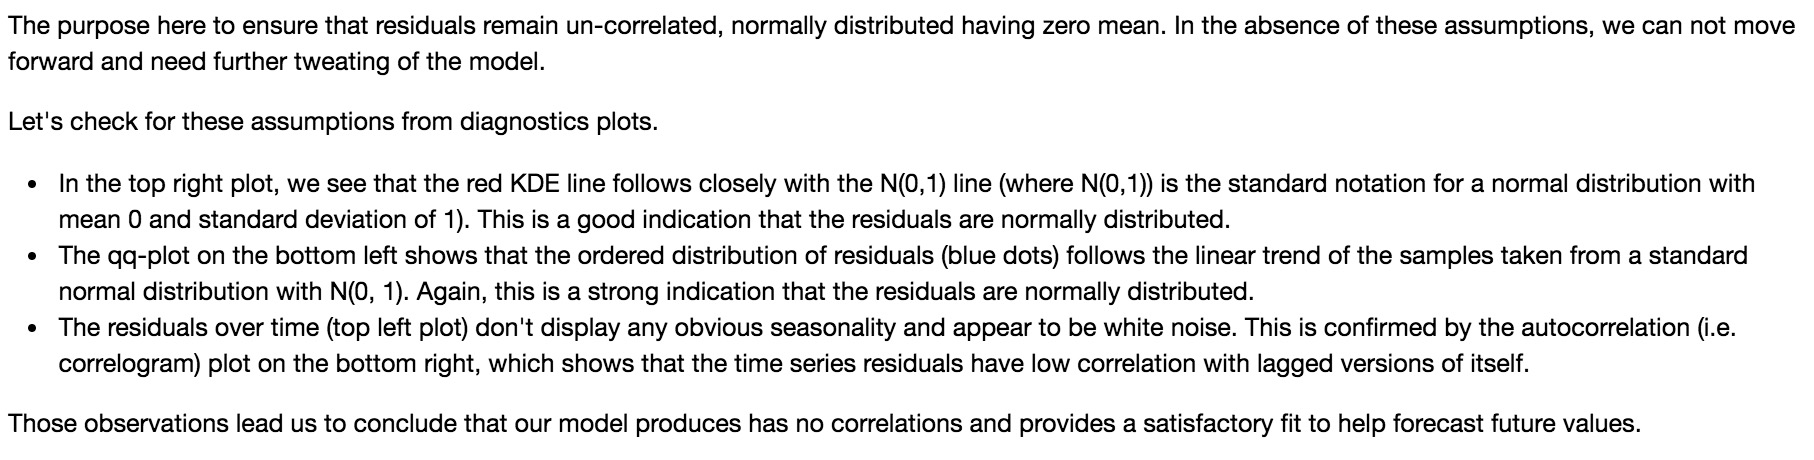

In [31]:
# plt.savefig('arima1.png')

<Figure size 432x288 with 0 Axes>

In [27]:
pred = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_conf = pred.conf_int()

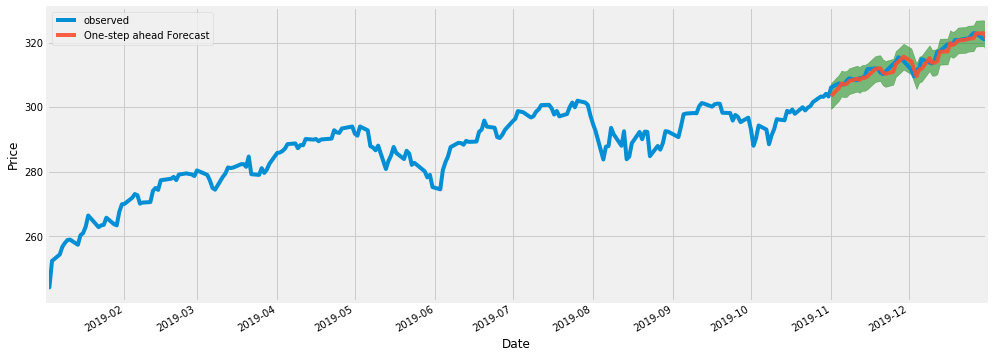

In [28]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2019':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.savefig('spypred.png')
plt.show()

In [29]:
price_forecasted = pred.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.85


In [30]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

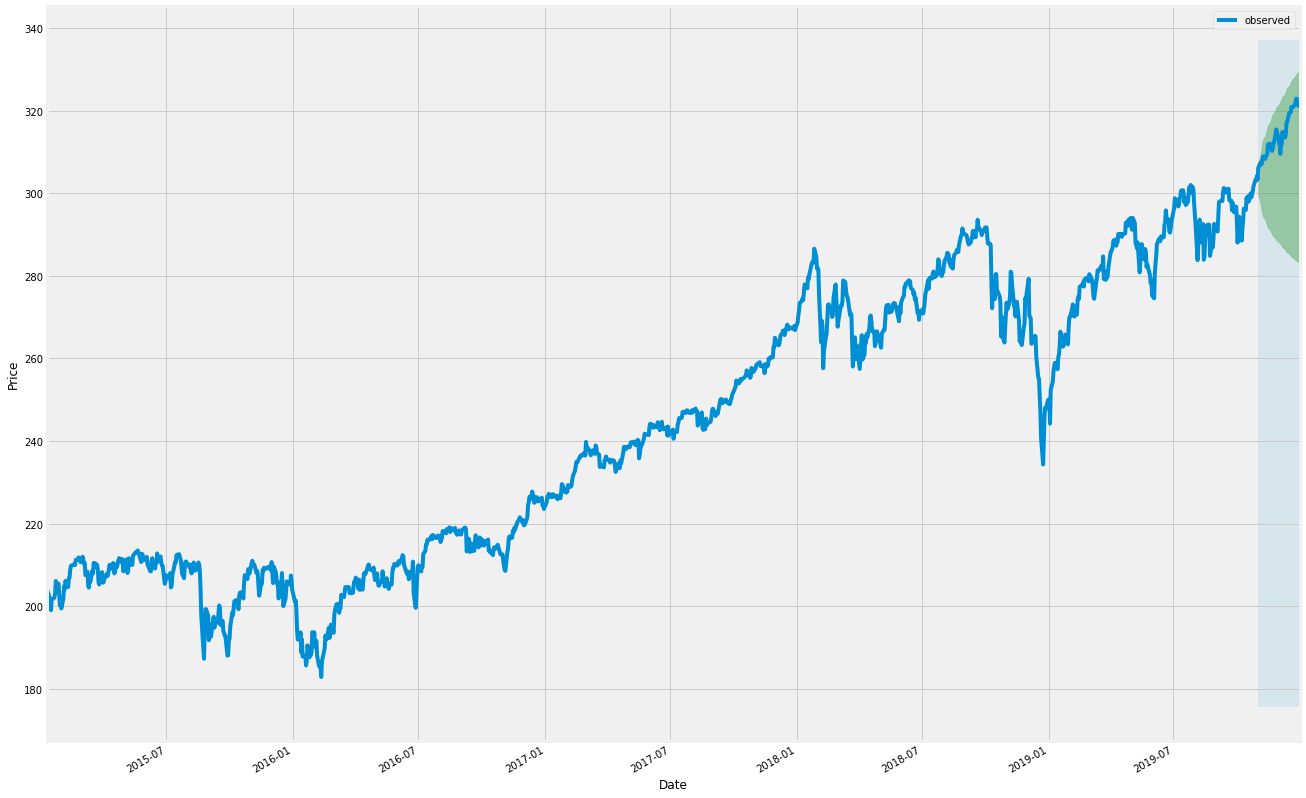

In [32]:
ax = ts['2015':].plot(label='observed', figsize=(20, 15))
# datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-11-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.savefig('spypred2.png')
plt.show()

In [33]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 99.71


In [34]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## FBProphet for Future

In [35]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

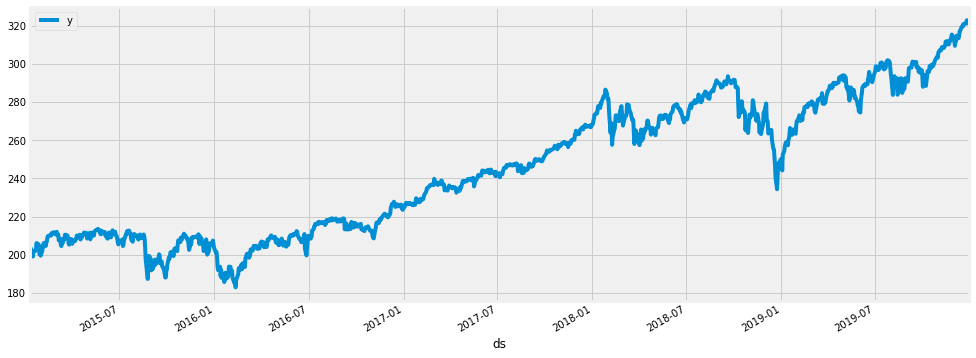

In [36]:
spy.set_index('ds').plot()

In [13]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

NameError: name 'proph' is not defined

In [12]:
inp

NameError: name 'inp' is not defined

In [38]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [61]:
spy_df_novjan = df.tail(71)
spy_df_novjan.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

In [66]:
spy_yf = pd.read_csv('SPY_yf.csv')
spy_yf = spy_yf.rename(columns={"Date": "ds"})
spy_yf['ds'] = pd.to_datetime(spy_yf['ds'])

spy_yf.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [70]:
spy_yf1 = spy_yf[['ds','Adj Close']]
spy_yf1

,ds,Adj Close
0,2019-11-01,304.642242
1,2019-11-04,305.866211
2,2019-11-05,305.527863
3,2019-11-06,305.597534
4,2019-11-07,306.672241
5,2019-11-08,307.428528
6,2019-11-11,306.841400
7,2019-11-12,307.488220
8,2019-11-13,307.587738
9,2019-11-14,308.035522


In [83]:
comb = spy_df_novjan.join(spy_yf1.set_index('ds'), on='ds')
# comb = comb.set_index('ds')
comb['difference'] = comb['Adj Close'] - comb['yhat']
comb['difference_pct'] = comb['difference']/comb['Adj Close']
comb['difference_pct'] = comb['difference_pct'].map("{:.2%}".format)
comb.to_csv('spy_predict_fbprophet.csv', encoding='utf-8')
comb = comb.drop([1253])
comb = comb.drop([1256])
comb = comb.drop([1257])
comb.tail(50)

,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
1230,2019-11-27,313.147637,304.269286,321.746408,313.936523,0.788886,0.25%
1231,2019-11-29,313.721484,304.918328,322.358767,312.772247,-0.949237,-0.30%
1232,2019-12-02,314.409544,306.013677,322.643825,310.115326,-4.294218,-1.38%
1233,2019-12-03,314.830358,306.438427,323.061511,308.035522,-6.794836,-2.21%
1234,2019-12-04,315.053909,306.718440,322.764861,309.936188,-5.117721,-1.65%
1235,2019-12-05,315.323006,307.279871,323.285204,310.493439,-4.829567,-1.56%
1236,2019-12-06,315.441814,307.028036,324.606343,313.329498,-2.112316,-0.67%
1237,2019-12-09,315.751907,307.062309,323.625114,312.344360,-3.407547,-1.09%
1238,2019-12-10,316.026279,308.014643,324.424818,311.996063,-4.030216,-1.29%
1239,2019-12-11,316.096780,307.488200,324.951946,312.881714,-3.215066,-1.03%


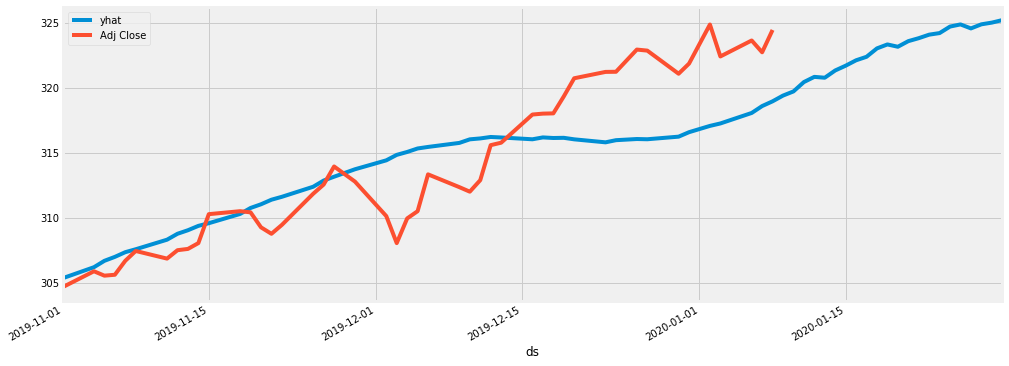

In [84]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.savefig('spy_fbproph_forecast.png')

In [10]:
comb = pd.read_csv('spy_predict_fbprophet.csv')
comb.tail(41)

,Unnamed: 0,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
20,1232,12/2/2019,314.409544,306.013677,322.643825,310.115326,-4.294218,-1.38%
21,1233,12/3/2019,314.830358,306.438427,323.061511,308.035522,-6.794836,-2.21%
22,1234,12/4/2019,315.053909,306.718440,322.764861,309.936188,-5.117721,-1.65%
23,1235,12/5/2019,315.323006,307.279871,323.285204,310.493439,-4.829567,-1.56%
24,1236,12/6/2019,315.441814,307.028036,324.606343,313.329498,-2.112316,-0.67%
25,1237,12/9/2019,315.751908,307.062309,323.625114,312.344360,-3.407547,-1.09%
26,1238,12/10/2019,316.026279,308.014643,324.424818,311.996063,-4.030216,-1.29%
27,1239,12/11/2019,316.096780,307.488200,324.951946,312.881714,-3.215066,-1.03%
28,1240,12/12/2019,316.208879,308.142961,324.814950,315.578461,-0.630418,-0.20%
29,1241,12/13/2019,316.169654,307.620552,324.275350,315.767517,-0.402137,-0.13%


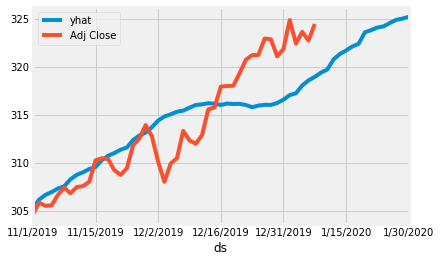

In [11]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.savefig('spy_fbproph_forecast.png')

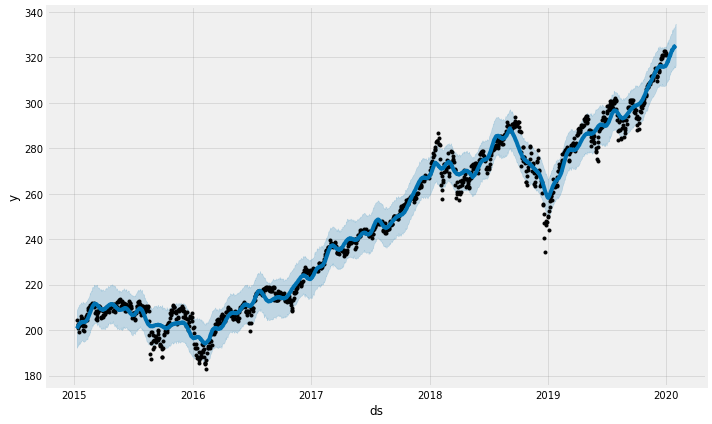

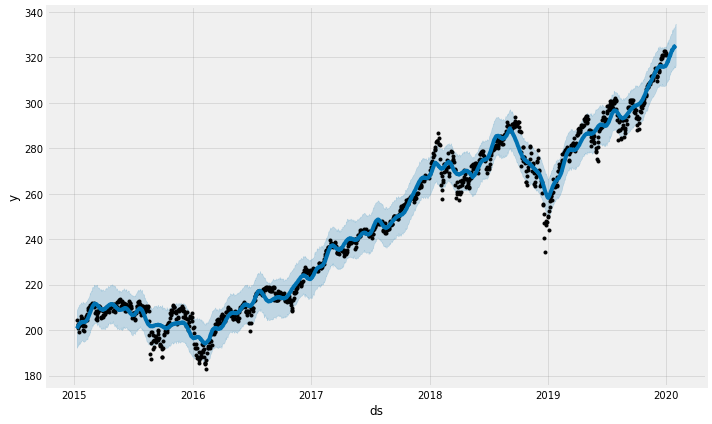

In [44]:
p.plot(df)
plt.savefig('what.png')

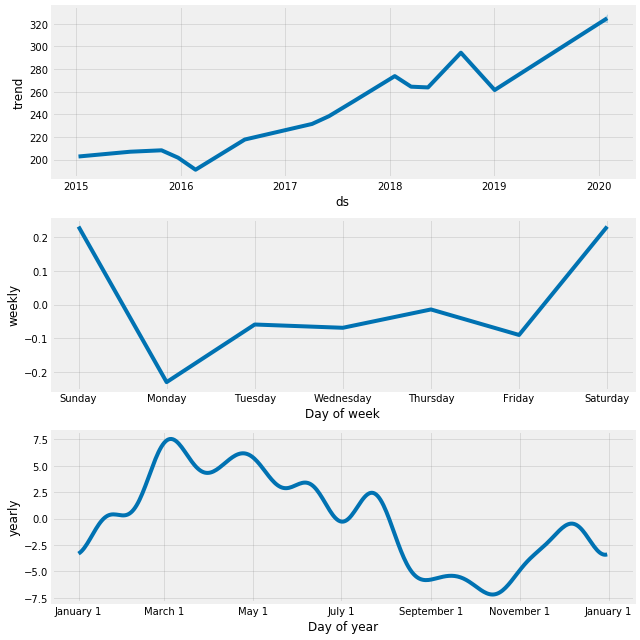

In [45]:
p.plot_components(out)
plt.savefig('spymovement.png')

In [46]:
split = pd.to_datetime('2019-12-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [47]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
pred = out[['ds', 'yhat']].set_index('ds')